## Principal Component Analysis - PCA

In [3]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
data = pd.read_csv('green transportation system.csv')
data.head()

,energy_efficiency,co2_emissions,electric_vehicle_penetration,cost_efficiency,public_transport_usage
0,17.490802,106.046123,46.499916,2.095361,27.934722
1,29.014286,99.936814,19.225600,1.648231,15.689067
2,24.639879,76.423087,27.331985,2.911246,17.581553
3,21.973170,141.090001,43.164032,1.047446,20.840268
4,13.120373,121.493624,34.104467,1.969641,22.219200


In [5]:
data.shape

(10000, 5)

In [6]:
# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
print(pd.DataFrame(data_scaled, columns=data.columns).head())

   energy_efficiency  co2_emissions  electric_vehicle_penetration  \
0          -0.415900      -0.452465                      0.801884   
1           1.587377      -0.593258                     -1.100359   
2           0.826917      -1.135149                     -0.534981   
3           0.363328       0.355146                      0.569224   
4          -1.175669      -0.096466                     -0.062635   

   cost_efficiency  public_transport_usage  
0         0.482494               -0.684316  
1        -0.136414               -1.389866  
2         1.611824               -1.280827  
3        -0.968007               -1.093072  
4         0.308475               -1.013623  


In [7]:
data_scaled

array([[-0.41590018, -0.45246481,  0.80188444,  0.482494  , -0.68431555],
       [ 1.58737745, -0.59325819, -1.10035932, -0.13641397, -1.38986562],
       [ 0.82691712, -1.13514888, -0.53498051,  1.61182405, -1.28082742],
       ...,
       [ 1.57344779, -0.69424553, -1.6759503 , -0.79294013,  0.87161312],
       [-0.33611361, -0.21159379, -0.34539599, -0.22283057,  0.0834761 ],
       [-0.96315712, -1.14859293, -0.84618813, -0.03906734,  1.26125511]])

In [8]:
# Initialise PCA
pca = PCA()
# Fit PCA on the scaled data
pca.fit(data_scaled)
# Explained variance ratio for each principal component
print("Explained variance ratio for each principal component")
print(pca.explained_variance_ratio_)
# Cumulative explained variance
print('\n Cumulative explained ratio')
print(np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio for each principal component
[0.20669281 0.20317681 0.2012694  0.19634014 0.19252083]

 Cumulative explained ratio
[0.20669281 0.40986962 0.61113902 0.80747917 1.        ]


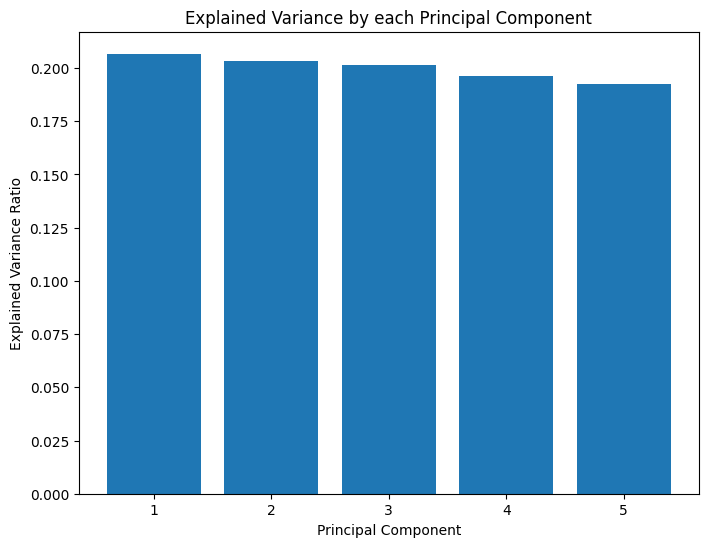

In [9]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance by each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

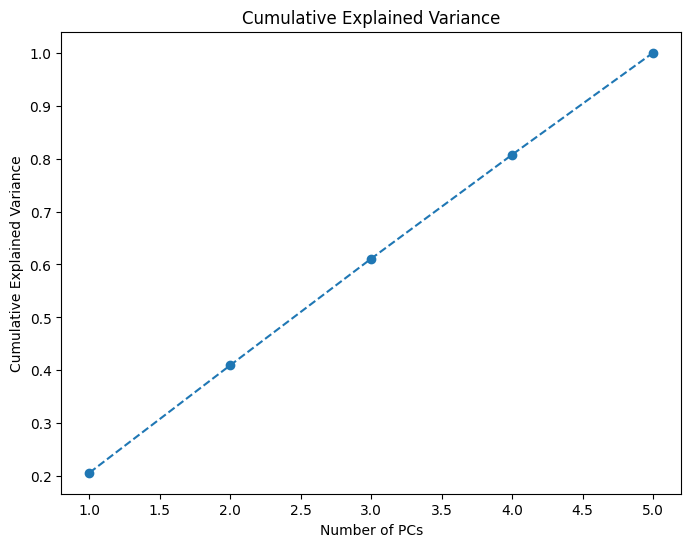

In [11]:
# Cumulative explained variance plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
        np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Explained Variance')
plt.show()

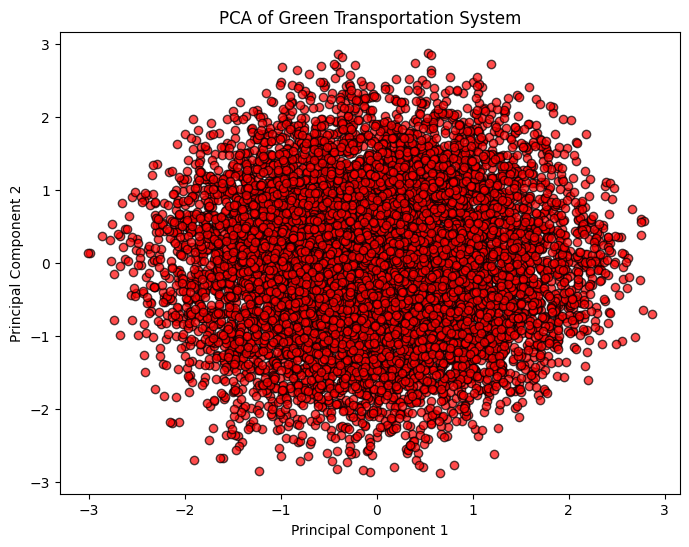

In [15]:
# Project the data onto the first two PCs
data_pca = pca.transform(data_scaled)
# Create a dataframe for first two PCs
pca_df = pd.DataFrame(data_pca[:, :2], columns=['PC1','PC2'])
# Visualise tthe data in 2D space for 2 PCs
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='red', edgecolors='k', alpha=0.7)
plt.title('PCA of Green Transportation System')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()